In [3]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Optional (for interactive plots)
# import plotly.express as px

In [5]:
# Step 2: Load the Titanic Dataset
df = pd.read_csv("Titanic-Dataset.csv.csv")

In [7]:
# Step 3: Generate Summary Statistics
print("📊 Summary Statistics:")
print(df.describe(include='all').transpose())

📊 Summary Statistics:
             count unique                      top freq       mean  \
PassengerId  891.0    NaN                      NaN  NaN      446.0   
Survived     891.0    NaN                      NaN  NaN   0.383838   
Pclass       891.0    NaN                      NaN  NaN   2.308642   
Name           891    891  Braund, Mr. Owen Harris    1        NaN   
Sex            891      2                     male  577        NaN   
Age          714.0    NaN                      NaN  NaN  29.699118   
SibSp        891.0    NaN                      NaN  NaN   0.523008   
Parch        891.0    NaN                      NaN  NaN   0.381594   
Ticket         891    681                   347082    7        NaN   
Fare         891.0    NaN                      NaN  NaN  32.204208   
Cabin          204    147                  B96 B98    4        NaN   
Embarked       889      3                        S  644        NaN   

                    std   min     25%      50%    75%       max  
P

In [9]:
# Add median separately
print("\n📈 Medians of Numeric Features:")
print(df.median(numeric_only=True))


📈 Medians of Numeric Features:
PassengerId    446.0000
Survived         0.0000
Pclass           3.0000
Age             28.0000
SibSp            0.0000
Parch            0.0000
Fare            14.4542
dtype: float64


In [11]:
# Calculate standard deviation for numeric columns only
std_values = df.std(numeric_only=True)

# Display the result
print("📊 Standard Deviation of Numeric Features:\n")
print(std_values)

📊 Standard Deviation of Numeric Features:

PassengerId    257.353842
Survived         0.486592
Pclass           0.836071
Age             14.526497
SibSp            1.102743
Parch            0.806057
Fare            49.693429
dtype: float64


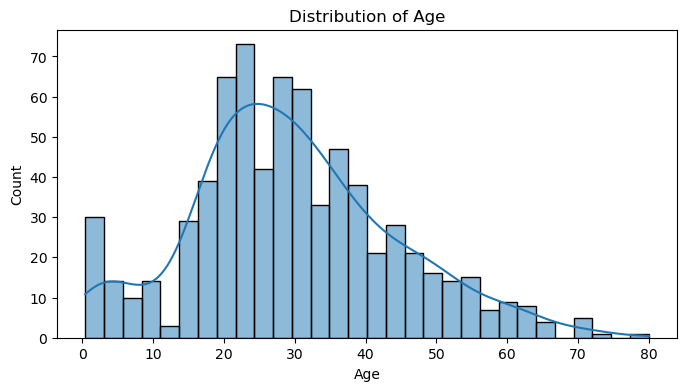

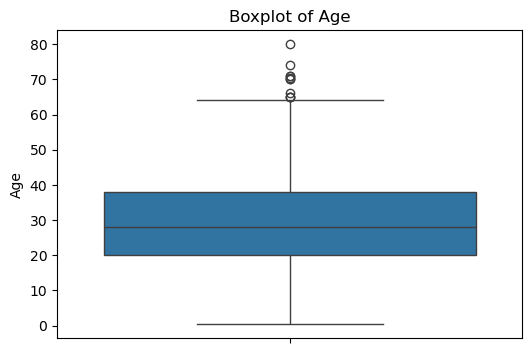

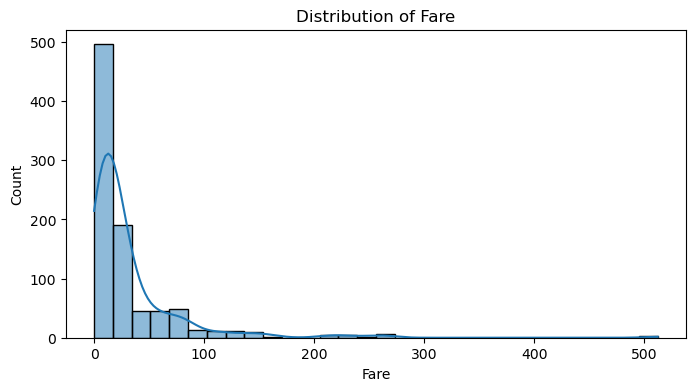

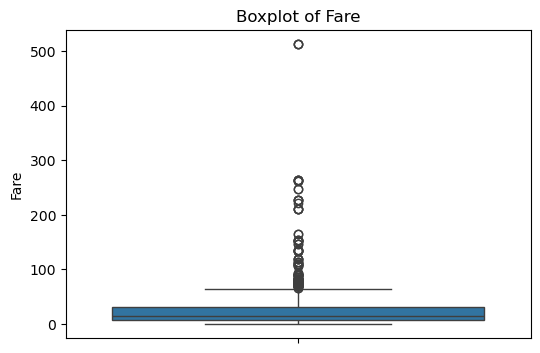

In [13]:
# Histogram: Age
plt.figure(figsize=(8, 4))
sns.histplot(df['Age'].dropna(), bins=30, kde=True)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# Boxplot: Age
plt.figure(figsize=(6, 4))
sns.boxplot(y=df['Age'])
plt.title("Boxplot of Age")
plt.show()

# Histogram: Fare
plt.figure(figsize=(8, 4))
sns.histplot(df['Fare'].dropna(), bins=30, kde=True)
plt.title("Distribution of Fare")
plt.xlabel("Fare")
plt.ylabel("Count")
plt.show()

# Boxplot: Fare
plt.figure(figsize=(6, 4))
sns.boxplot(y=df['Fare'])
plt.title("Boxplot of Fare")
plt.show()

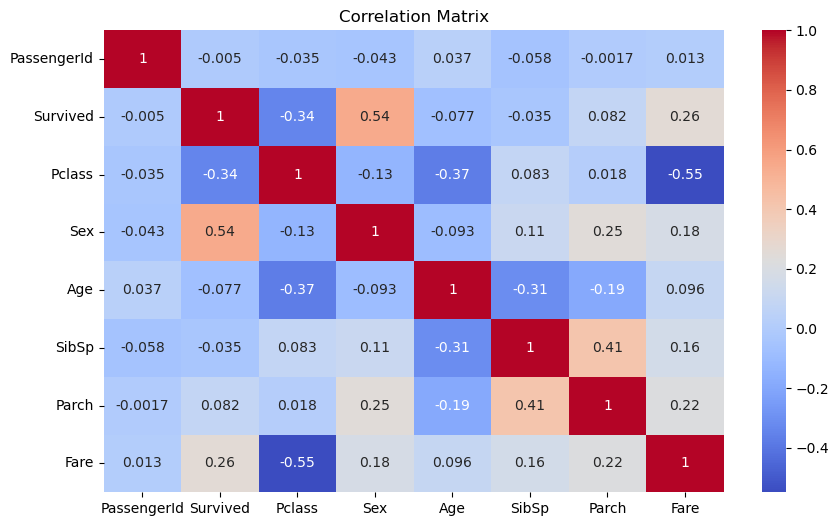

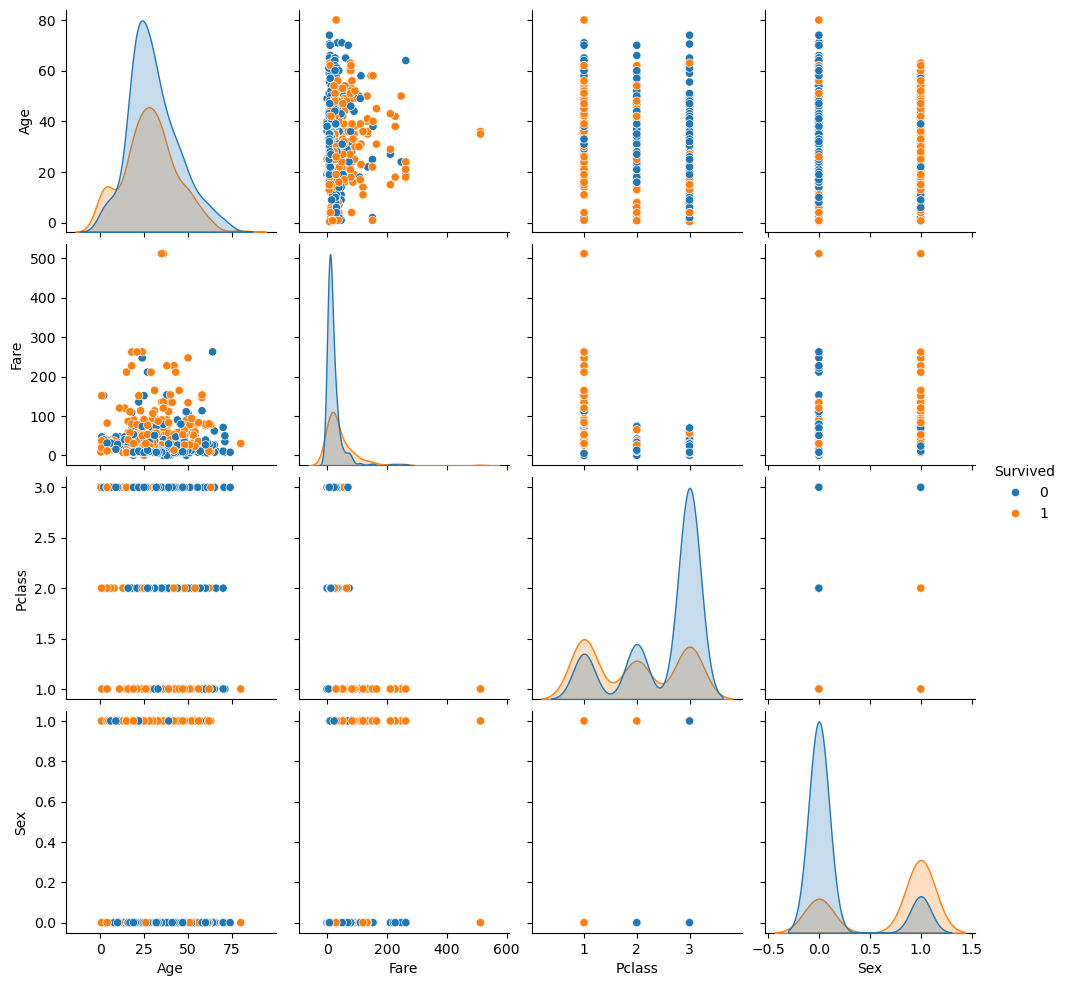

In [15]:
# Encode categorical features for correlation
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Drop non-numeric for correlation
corr_data = df.select_dtypes(include=[np.number])

# Correlation Matrix Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Pairplot (Optional - visual relations)
sns.pairplot(corr_data[['Survived', 'Age', 'Fare', 'Pclass', 'Sex']], hue='Survived')
plt.show()

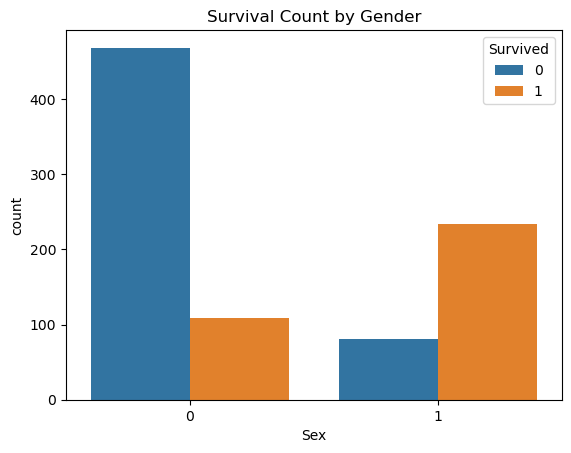

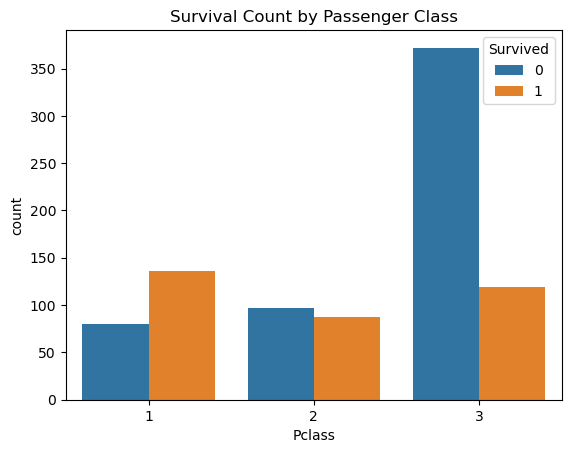

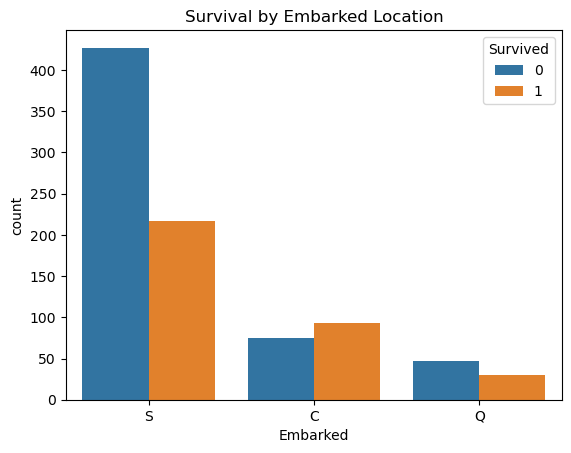

In [17]:
# Survival by Gender
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Survival Count by Gender")
plt.show()

# Survival by Pclass
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title("Survival Count by Passenger Class")
plt.show()

# Survival Rate by Embarked
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title("Survival by Embarked Location")
plt.show()

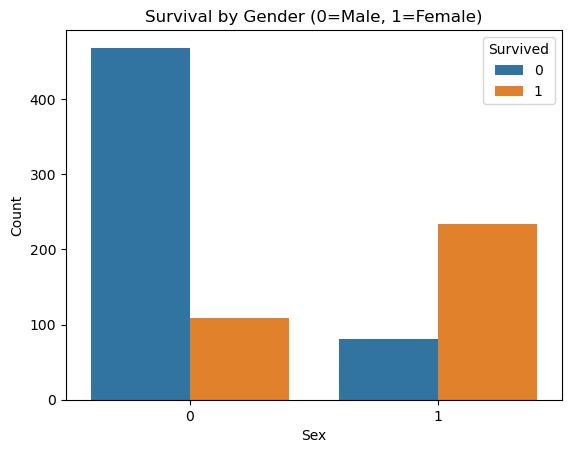

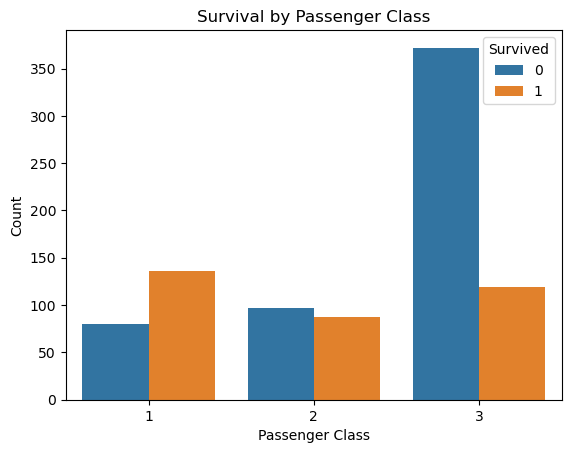

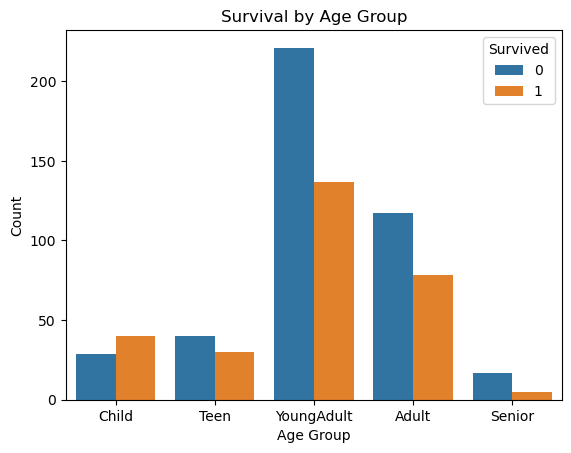

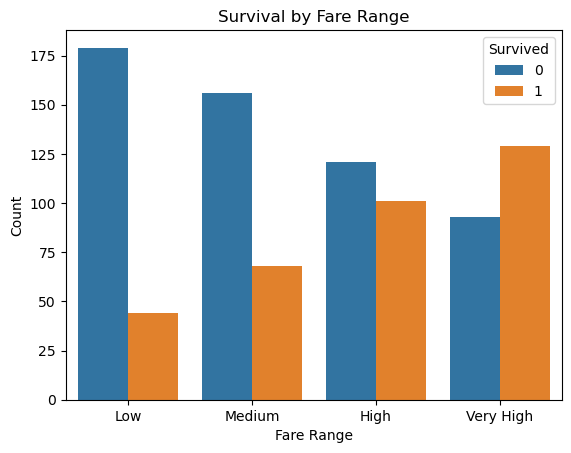

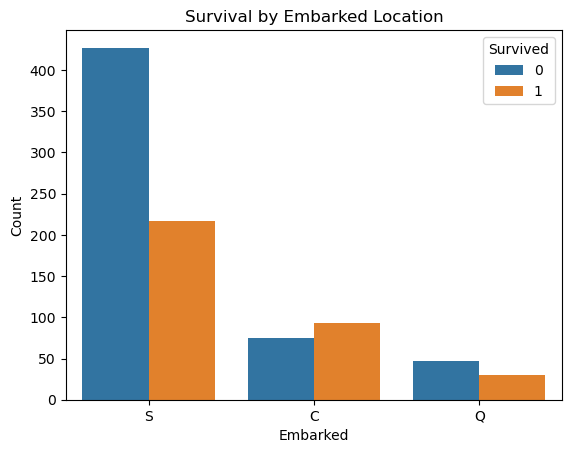

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Titanic Dataset
df = pd.read_csv("Titanic-Dataset.csv.csv")

# Map 'Sex' for easier analysis
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# 1. Inference: Survival by Gender
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title("Survival by Gender (0=Male, 1=Female)")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

# 2. Inference: Survival by Passenger Class
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title("Survival by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.show()

# 3. Inference: Survival by Age (grouped)
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 80], labels=["Child", "Teen", "YoungAdult", "Adult", "Senior"])
sns.countplot(data=df, x='AgeGroup', hue='Survived')
plt.title("Survival by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()

# 4. Inference: Survival by Fare
df['FareGroup'] = pd.qcut(df['Fare'], 4, labels=["Low", "Medium", "High", "Very High"])
sns.countplot(data=df, x='FareGroup', hue='Survived')
plt.title("Survival by Fare Range")
plt.xlabel("Fare Range")
plt.ylabel("Count")
plt.show()

# 5. Inference: Survival by Embarked
sns.countplot(data=df, x='Embarked', hue='Survived')
plt.title("Survival by Embarked Location")
plt.xlabel("Embarked")
plt.ylabel("Count")
plt.show()